In [2]:
import json
import pandas as pd

input_file = "/content/drive/MyDrive/mava/trendyo_limited2.json"

with open(input_file, "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)
print(len(df))


579462


In [33]:
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
import json

root = Node("Trendyol")

categories = {}

for item in data:
    if item['ana_kategori'] not in categories:
        categories[item['ana_kategori']] = Node(item['ana_kategori'], parent=root)

    alt_kategori_1_key = f"{item['ana_kategori']}_{item['alt_kategori_1']}"
    if alt_kategori_1_key not in categories:
        categories[alt_kategori_1_key] = Node(item['alt_kategori_1'], parent=categories[item['ana_kategori']])

    alt_kategori_2_key = f"{alt_kategori_1_key}_{item['alt_kategori_2']}"
    if alt_kategori_2_key not in categories:
        categories[alt_kategori_2_key] = Node(item['alt_kategori_2'], parent=categories[alt_kategori_1_key])

In [3]:
import re

def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = text.strip()
        text = re.sub(r"\s+", " ", text)
        text = re.sub(r"[^\w\s]", "", text)
    return text

def preprocess_column(df, column_name):

    df[column_name] = df[column_name].apply(preprocess_text)
    return df

df = preprocess_column(df, "title")

df["title"].sample(10)

,title
352378,beli kuşaklı desenli kimono standart renk y221...
451324,altın rengi 4 rakam pasta mumu
199581,porgia koyu taş erkek şort
179851,half zip melange polar m erkek bordo sweatshir...
283277,yıldız demonte tek çekmeceli hediyelik çok ama...
319229,lisansli barbie matara
452729,20 li plastik kullan at shot bardağı 20 adet p...
201131,erkek nakışlı logo organik pamuklu slim fit bi...
404566,makoweruk patchwork kırkyama kumaşı 2800g65
275835,yapraklar kadife kumaş 2li kırlent kılıfı 35x5...


In [4]:
from sklearn.preprocessing import LabelEncoder

def mergeCategories(df, columns):
    df["merged_categories"] = df[columns].apply(lambda x: "_".join(x.astype(str)), axis=1)
    return df

df = mergeCategories(df, ["ana_kategori", "alt_kategori_1", "alt_kategori_2"])

le = LabelEncoder()
df['merged_categories_le'] = le.fit_transform(df['merged_categories'])

In [5]:
df.head(10)

,ana_kategori,alt_kategori_1,alt_kategori_2,marka,title,link,price,rating,comment_count,merged_categories,merged_categories_le
0,Anne & Çocuk,Bebek,Bebek Body & Zıbın,ADABEBEK,100 pamuk babaannesinin minik aşkı uzun kollu ...,https://www.trendyol.com/adabebek/100-pamuk-ba...,"148,49 TL",4.0,1,Anne & Çocuk_Bebek_Bebek Body & Zıbın,7
1,Anne & Çocuk,Bebek,Bebek Body & Zıbın,ADABEBEK,bulutlarda uyuyan pembe minik teddy bear ve yı...,https://www.trendyol.com/adabebek/bulutlarda-u...,"148,49 TL",,,Anne & Çocuk_Bebek_Bebek Body & Zıbın,7
2,Anne & Çocuk,Bebek,Bebek Body & Zıbın,ADABEBEK,ay üzerinde tilki baskılı askılı çıtçıtlı body...,https://www.trendyol.com/adabebek/ay-uzerinde-...,"148,49 TL",,,Anne & Çocuk_Bebek_Bebek Body & Zıbın,7
3,Anne & Çocuk,Bebek,Bebek Body & Zıbın,ADABEBEK,its a girl yazılı ayak desenli baskılı askılı ...,https://www.trendyol.com/adabebek/it-s-a-girl-...,"148,49 TL",,,Anne & Çocuk_Bebek_Bebek Body & Zıbın,7
4,Anne & Çocuk,Bebek,Bebek Body & Zıbın,ADABEBEK,100 pamuk organik noel crismıs askılı body bad...,https://www.trendyol.com/adabebek/100-pamuk-or...,"148,49 TL",,,Anne & Çocuk_Bebek_Bebek Body & Zıbın,7
5,Anne & Çocuk,Bebek,Bebek Body & Zıbın,ADABEBEK,100 pamuk kardan adam christmas askılı body ba...,https://www.trendyol.com/adabebek/100-pamuk-ka...,"148,49 TL",,,Anne & Çocuk_Bebek_Bebek Body & Zıbın,7
6,Anne & Çocuk,Bebek,Bebek Body & Zıbın,ADABEBEK,100 pamuk kardan adam christmas kısa kol body ...,https://www.trendyol.com/adabebek/100-pamuk-ka...,"148,49 TL",,,Anne & Çocuk_Bebek_Bebek Body & Zıbın,7
7,Anne & Çocuk,Bebek,Bebek Body & Zıbın,ADABEBEK,100 pamuk organik watercolor noel baba kısa ko...,https://www.trendyol.com/adabebek/100-pamuk-or...,"148,49 TL",,,Anne & Çocuk_Bebek_Bebek Body & Zıbın,7
8,Anne & Çocuk,Bebek,Bebek Body & Zıbın,ADABEBEK,100 pamuk kardan adam christmas askılı body ba...,https://www.trendyol.com/adabebek/100-pamuk-ka...,"148,49 TL",,,Anne & Çocuk_Bebek_Bebek Body & Zıbın,7
9,Anne & Çocuk,Bebek,Bebek Body & Zıbın,ADABEBEK,100 pamuk sevimli dinozor christmas kısa kol b...,https://www.trendyol.com/adabebek/100-pamuk-se...,"148,49 TL",,,Anne & Çocuk_Bebek_Bebek Body & Zıbın,7


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def add_tokenized_column(df, text_column='title', token_column='tokenized_title', max_len=30, num_words=3000):
    tokenizer = Tokenizer(num_words=num_words, oov_token="<OOV>")
    tokenizer.fit_on_texts(df[text_column])

    sequences = tokenizer.texts_to_sequences(df[text_column])
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

    df[token_column] = list(padded_sequences)
    return df, tokenizer

df, tokenizer = add_tokenized_column(df, text_column='title')


In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

padded = df["tokenized_title"]
X_train, X_test, y_train, y_test = train_test_split(
    padded, df["merged_categories_le"], test_size=0.2, random_state=42, stratify=df["merged_categories_le"]
)

X_train = np.array(X_train.tolist())
X_test = np.array(X_test.tolist())
y_train = np.array(y_train.tolist())
y_test = np.array(y_test.tolist())

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Attention

def build_lstm_model(input_length, vocab_size, num_classes, embedding_dim=128, lstm_units=64, dropout_rate=0.5):
    input_layer = Input(shape=(input_length,))
    embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)
    lstm_layer = LSTM(lstm_units, return_sequences=True)(embedding_layer)
    attention_layer = Attention()([lstm_layer, lstm_layer])
    global_pool = GlobalMaxPooling1D()(attention_layer)
    dropout_layer = Dropout(dropout_rate)(global_pool)
    dense_layer = Dense(64, activation="relu")(dropout_layer)
    output_layer = Dense(num_classes, activation="softmax")(dense_layer)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0005), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    return model

In [9]:
model = build_lstm_model(input_length=30, vocab_size=3000, num_classes=len(df["merged_categories_le"].unique()))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 30, 128)   │    384,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 30, 64)    │     49,408 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 30, 64)    │          0 │ lstm[0][0],       │
│ (Attention)         │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ attention[0][0]   │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      4,160 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 468)       │     30,420 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 467,988 (1.79 MB)

 Trainable params: 467,988 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)]
)

Epoch 1/30
14487/14487 ━━━━━━━━━━━━━━━━━━━━ 507s 35ms/step - accuracy: 0.0867 - loss: 4.7125 - val_accuracy: 0.5513 - val_loss: 2.0551
Epoch 2/30
14487/14487 ━━━━━━━━━━━━━━━━━━━━ 502s 35ms/step - accuracy: 0.5186 - loss: 2.1374 - val_accuracy: 0.6319 - val_loss: 1.6299
Epoch 3/30
14487/14487 ━━━━━━━━━━━━━━━━━━━━ 564s 35ms/step - accuracy: 0.5971 - loss: 1.7709 - val_accuracy: 0.6562 - val_loss: 1.4955
Epoch 4/30
14487/14487 ━━━━━━━━━━━━━━━━━━━━ 568s 35ms/step - accuracy: 0.6260 - loss: 1.6273 - val_accuracy: 0.6718 - val_loss: 1.4189
Epoch 5/30
14487/14487 ━━━━━━━━━━━━━━━━━━━━ 522s 36ms/step - accuracy: 0.6447 - loss: 1.5334 - val_accuracy: 0.6819 - val_loss: 1.3640
Epoch 6/30
14487/14487 ━━━━━━━━━━━━━━━━━━━━ 511s 35ms/step - accuracy: 0.6555 - loss: 1.4706 - val_accuracy: 0.6901 - val_loss: 1.3238
Epoch 7/30
14487/14487 ━━━━━━━━━━━━━━━━━━━━ 571s 36ms/step - accuracy: 0.6657 - loss: 1.4162 - val_accuracy: 0.6982 - val_loss: 1.2926
Epoch 8/30
14487/14487 ━━━━━━━━━━━━━━━━━━━━ 562s 36ms/s

In [17]:
def predict_product(product_name, tokenizer, labelencoder):

    product_name = product_name.lower().strip()
    sequence = tokenizer.texts_to_sequences([product_name])
    padded_sequence = pad_sequences(sequence, maxlen=30, padding="post")
    pred_probs = model.predict(padded_sequence)
    pred_class = np.argmax(pred_probs, axis=1)

    predicted_category = labelencoder.inverse_transform(pred_class)

    return predicted_category[0]


test_products = ["sleepy bebek bezi", "bebek bezi sleepy", "ultra güçlü bebek bezi sızdırmaz"]
print("\nÖzel Ürün Adları İçin Tahminler:")
for product in test_products:
    predicted_label = predict_product(product, tokenizer, le)
    print(f"Ürün: '{product}'")
    print(f"Tahmin Edilen Etiket: {predicted_label}\n")


Özel Ürün Adları İçin Tahminler:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Ürün: 'sleepy bebek bezi'
Tahmin Edilen Etiket: Anne & Çocuk_Bebek Bakım_Bebek Bakım ve Kozmetik

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Ürün: 'bebek bezi sleepy'
Tahmin Edilen Etiket: Anne & Çocuk_Bebek Bakım_Bebek Bakım ve Kozmetik

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Ürün: 'ultra güçlü bebek bezi sızdırmaz'
Tahmin Edilen Etiket: Anne & Çocuk_Bebek Bakım_Bebek Bakım ve Kozmetik

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Ürün: 'apple iphone 16 128 gb'
Tahmin Edilen Etiket: Elektronik_Telefon_Cep Telefonu



3622/3622 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step


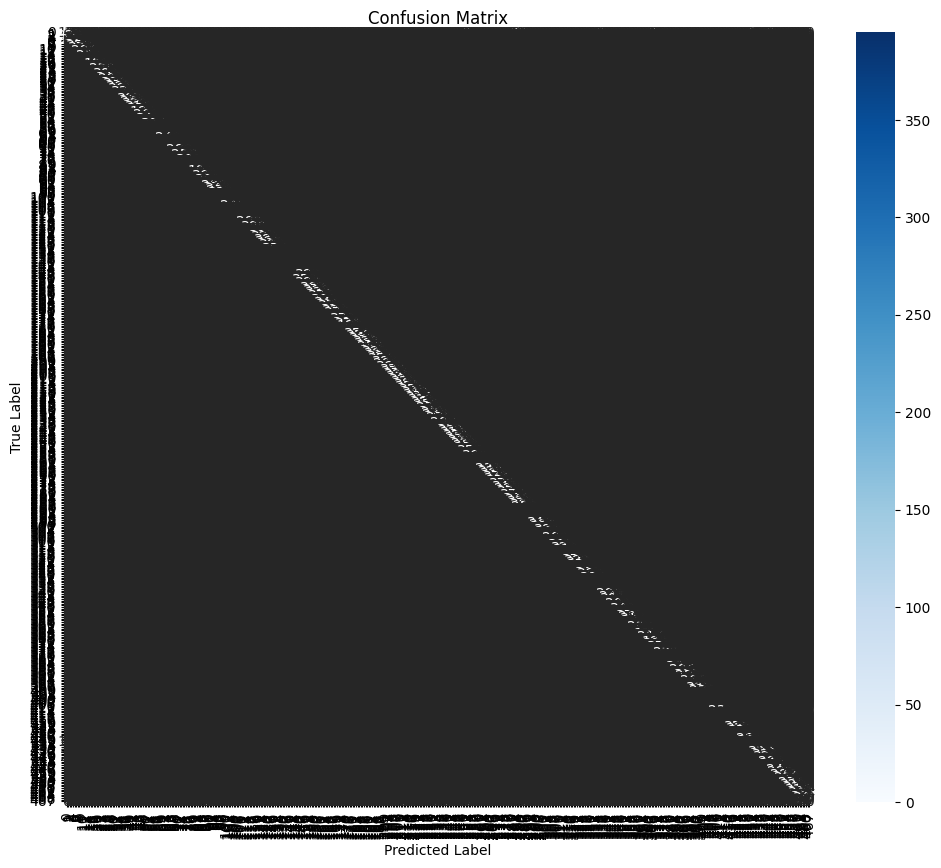


Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.18      0.26       101
           1       0.75      0.61      0.67       400
           2       0.83      0.81      0.82       400
           3       0.40      0.91      0.56        23
           4       0.63      0.90      0.74       269
           5       0.49      0.96      0.65        47
           6       0.19      0.09      0.12        54
           7       0.92      0.90      0.91       400
           8       0.91      0.88      0.89       400
           9       0.95      0.94      0.94       400
          10       0.88      0.86      0.87       191
          11       0.54      0.73      0.62       400
          12       0.85      0.63      0.72        89
          13       0.60      0.40      0.48       349
          14       0.67      0.53      0.59       400
          15       0.63      0.49      0.55       240
          16       0.39      0.31      0.35       400
  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Tahminler
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# 2. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = df["merged_categories_le"].unique()
labels_sorted = np.sort(labels)  # Etiket sırasını garanti altına alır

# 3. Matris görselleştirme
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_sorted, yticklabels=labels_sorted)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 4. Ek olarak detaylı metrikler
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=[str(l) for l in labels_sorted]))


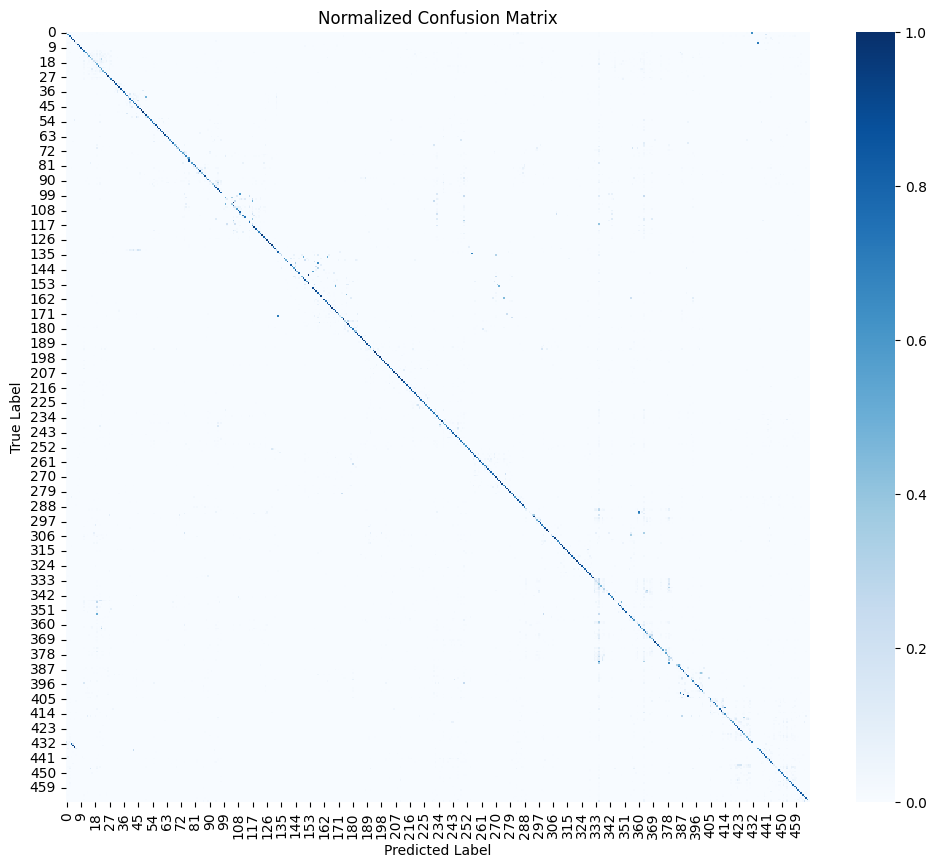

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred, normalize='true')  # normalize ekledik

plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap='Blues')
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


3622/3622 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step


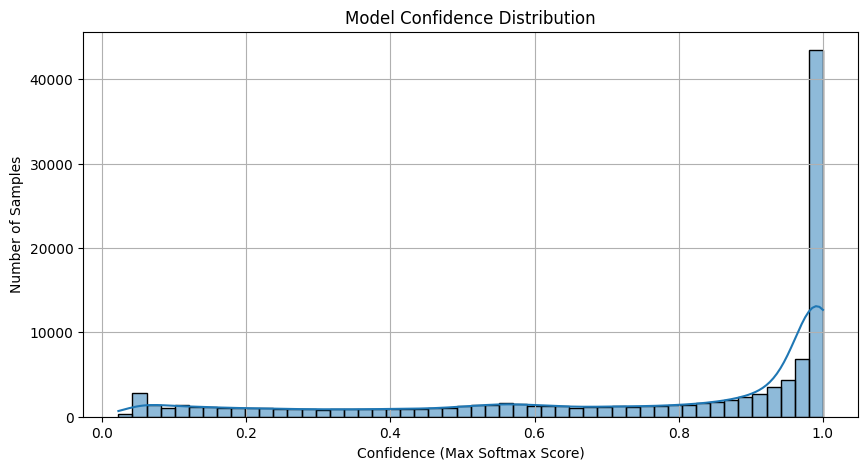

Avg confidence (correct): 0.8757125
Avg confidence (incorrect): 0.4134445


In [29]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


y_proba = model.predict(X_test)
max_confidences = np.max(y_proba, axis=1)
plt.figure(figsize=(10, 5))
sns.histplot(max_confidences, bins=50, kde=True)
plt.title("Model Confidence Distribution")
plt.xlabel("Confidence (Max Softmax Score)")
plt.ylabel("Number of Samples")
plt.grid()
plt.show()

correct_mask = y_pred == y_test
incorrect_mask = ~correct_mask
print("Avg confidence (correct):", np.mean(max_confidences[correct_mask]))
print("Avg confidence (incorrect):", np.mean(max_confidences[incorrect_mask]))


In [24]:
model.save("/content/drive/MyDrive/mava/model1.h5")

In [25]:
import pickle

with open('/content/drive/MyDrive/mava/tokenizer1.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)


In [26]:
with open('/content/drive/MyDrive/mava/label_encoder1.pkl', 'wb') as f:
    pickle.dump(le, f)
